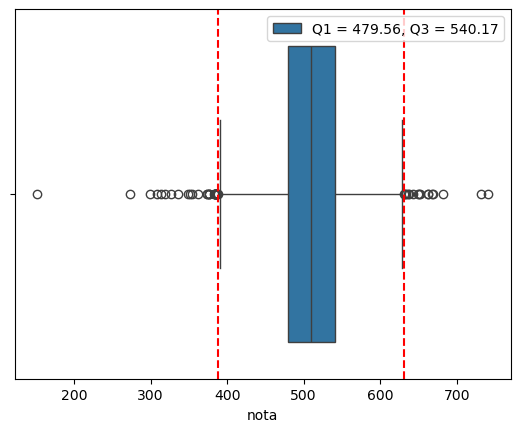

Coeficientes: [ 2.63600414e+03  1.80607109e+01 -1.39186843e+03 -2.21931918e+01
 -7.52779885e-02]
Intercepto: -652.8076416165061
R^2: 0.3256752624511864


<Figure size 640x480 with 0 Axes>

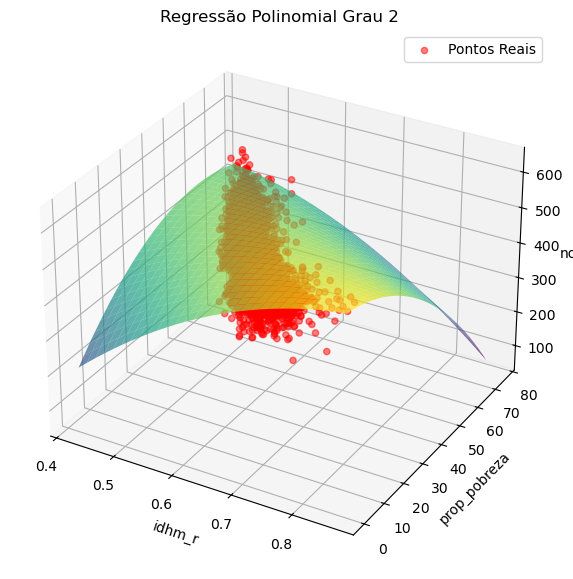

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unidecode
from pandas.api.types import is_numeric_dtype
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
#_____________________________________________________________________________________________________________________________________
def plotar_superficie_linear(df, col_x, col_y, col_z, grid_size=30):
    """
    Plota a superfície 3D de um modelo de regressão linear múltipla.

    Parâmetros:
    - df: DataFrame com os dados
    - col_x, col_y, col_z: nomes das colunas (x, y = preditores, z = resposta)
    - grid_size: resolução da malha para suavidade da superfície
    """
    # Dados de entrada
    X = df[[col_x, col_y]].values
    y = df[col_z].values

    # Treina o modelo linear
    model = LinearRegression()
    model.fit(X, y)

    # Gera a malha para predição
    x_range = np.linspace(df[col_x].min(), df[col_x].max(), grid_size)
    y_range = np.linspace(df[col_y].min(), df[col_y].max(), grid_size)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    xy_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
    z_pred = model.predict(xy_grid).reshape(x_grid.shape)

    # Plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.7)
    ax.scatter(df[col_x], df[col_y], df[col_z], color='red', label='Pontos Reais', alpha=0.5)

    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.set_zlabel(col_z)
    ax.set_title('Superfície de Regressão Linear Múltipla')
    ax.legend()
    plt.show()
def plotar_superficie_polinomial(df, col_x, col_y, col_z, grau=2, grid_size=30):
    """
    Plota a superfície de um modelo de regressão polinomial múltipla 3D.

    Parâmetros:
    - df: DataFrame com os dados
    - col_x, col_y, col_z: nomes das colunas (x, y = preditores, z = variável resposta)
    - grau: grau do polinômio (default: 2)
    - grid_size: resolução da malha (quanto maior, mais suave a superfície)
    """
    # Extrai os dados
    X = df[[col_x, col_y]].values
    y = df[col_z].values

    # Geração de termos polinomiais
    poly = PolynomialFeatures(degree=grau)
    X_poly = poly.fit_transform(X)

    # Treina o modelo
    model = LinearRegression()
    model.fit(X_poly, y)

    # Geração de grid para superfície
    x_range = np.linspace(df[col_x].min(), df[col_x].max(), grid_size)
    y_range = np.linspace(df[col_y].min(), df[col_y].max(), grid_size)
    x_grid, y_grid = np.meshgrid(x_range, y_range)
    grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]
    grid_poly = poly.transform(grid_points)
    z_pred = model.predict(grid_poly).reshape(x_grid.shape)

    # Plotagem
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_grid, y_grid, z_pred, cmap='viridis', alpha=0.7)
    ax.scatter(df[col_x], df[col_y], df[col_z], color='red', alpha=0.5, label='Pontos Reais')
    
    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.set_zlabel(col_z)
    ax.set_title(f'Regressão Polinomial Grau {grau}')
    ax.legend()
    plt.show()
def plotar_grafico_3d(df, col_x, col_y, col_z):
    """
    Plota um gráfico 3D scatter com base em três colunas de um DataFrame.

    Parâmetros:
    - df: DataFrame com os dados
    - col_x, col_y, col_z: nomes das colunas para os eixos x, y e z
    - titulo: título do gráfico
    """
    x = df[col_x]
    y = df[col_y]
    z = df[col_z]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x, y, z, c=z, cmap='viridis')

    ax.set_xlabel(col_x)
    ax.set_ylabel(col_y)
    ax.set_zlabel(col_z)
    plt.colorbar(scatter, label=col_z)
    plt.show()
def regressao_linear_multipla(df, colunas_explicativas, coluna_resposta):
    X = df[colunas_explicativas].dropna()
    y = df.loc[X.index, coluna_resposta]
    modelo = LinearRegression().fit(X, y)
    r2 = modelo.score(X, y)
    print("Coeficientes:", dict(zip(colunas_explicativas, modelo.coef_)))
    print("Intercepto:", modelo.intercept_)
    print("R^2:", r2)
    return modelo


def regressao_polinomial_multipla(df, colunas_explicativas, coluna_resposta, grau=2):
    X = df[colunas_explicativas].dropna()
    y = df.loc[X.index, coluna_resposta]
    poly = PolynomialFeatures(degree=grau, include_bias=False)
    X_poly = poly.fit_transform(X)
    modelo = LinearRegression().fit(X_poly, y)
    r2 = modelo.score(X_poly, y)
    print("Coeficientes:", modelo.coef_)
    print("Intercepto:", modelo.intercept_)
    print("R^2:", r2)
    return modelo, poly
#_____________________________________________________________________________________________________________________________
# Caarrega os dados do ENEM 2023 já processados:
medianotas = pd.read_csv("medianotas.csv")

# Carrega os dados do censo por município:
idh_m = pd.read_csv("C:\\Users\\vicen\\Downloads\\mundo_onu_adh_municipio.csv.gz", sep=',', encoding='latin1')

# Carrega o tradutor de nomes de municípios:
tradutor = pd.read_csv("C:\\Users\\vicen\\Downloads\\br_bd_diretorios_brasil_municipio.csv.gz", sep=',', encoding='latin1')

# Coloca os nomes dos municípios no df idh_m:
idh_m = idh_m.merge(tradutor, left_on='id_municipio', right_on='id_municipio', how='left')

# Filtra os dados do IDH para o ano de 2010:
idh_m = idh_m.query('ano == 2010')

sns.boxplot(data = medianotas, x='nota')
q1 = medianotas['nota'].quantile(0.25)
q3 = medianotas['nota'].quantile(0.75)
iq = q3 - q1
plt.legend(['Q1 = {:.2f}, Q3 = {:.2f}'.format(q1, q3)])
ia0, ia1 = q1 - 1.5 * iq, q3 + 1.5 * iq
outliers = medianotas.query('nota < @ia0 or nota > @ia1')
#plt.scatter(medianotas['nota'], medianotas['NO_MUNICIPIO_ESC'], color='blue', alpha=0.5)
#plt.scatter(outliers['nota'], outliers['NO_MUNICIPIO_ESC'], color='red', alpha=0.5)
plt.axvline(ia0, color='red', linestyle='--')
plt.axvline(ia1, color='red', linestyle='--')
plt.show()
medianotas = medianotas.query('nota >= @ia0 and nota <= @ia1')


plt.clf()
# formato consistente para juntar os dois DataFrames:
idh_m['nome'] = idh_m['nome'].astype(str).str.upper().str.strip().apply(unidecode.unidecode)
merged = medianotas = medianotas.merge(idh_m, left_on='NO_MUNICIPIO_ESC', right_on='nome', how='inner')
def correlacao(coluna):
    return merged['nota'].corr(merged[coluna])


d = {}
for coluna in idh_m.columns:
    if is_numeric_dtype(idh_m[coluna]) and coluna not in ['id_municipio', 'ano']:
        d[coluna] = correlacao(coluna)
d = dict(sorted(d.items(), key=lambda item: abs(item[1]), reverse=True))
df = pd.DataFrame(d.items(), columns=['Coluna', 'Correlação'])
#__________________________________________________________________________________________
#print(df.query('Correlação > 0.4 or Correlação < -0.4').head(30))
#plotar_grafico_3d(merged, 'idhm_r', 'prop_pobreza', 'nota')
#regressao_linear_multipla(merged, ['idhm_r', 'prop_pobreza'], 'nota')
regressao_polinomial_multipla(merged, ['idhm_r', 'prop_pobreza'], 'nota', grau=2)
plotar_superficie_polinomial(merged, 'idhm_r', 'prop_pobreza', 'nota', grau=2, grid_size=30)
#plotar_superficie_linear(merged, 'nota', 'renda_pc', 'idhm', grid_size=30)